# Customer Segmentation RFM & CLUSTER


In [132]:
###############################################################
# Customer Segmentation with RFM
###############################################################

# Customer Segmentation with RFM in 6 Steps

# 1. Business Problem
# 2. Data Understanding
# 3. Data Preparation
# 4. Calculating RFM Metrics
# 5. Calculating RFM Scores
# 6. Naming & Analysing RFM Segments




### Data Understanding

In [133]:
import datetime as dt
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")

In [134]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [135]:
df["Country"].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Thailand                    76
Hong Kong                   76
Israel  

In [136]:
df=df[df["Country"]== "Germany"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany


In [137]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [138]:
# What is the number of unique products?
df["Description"].nunique()

1616

In [139]:
# how many of which products do you have?
df["Description"].value_counts().head()

POSTAGE                                280
ROUND SNACK BOXES SET OF4 WOODLAND     102
WOODLAND CHARLOTTE BAG                  77
ROUND SNACK BOXES SET OF 4 FRUITS       67
RED TOADSTOOL LED NIGHT LIGHT           66
Name: Description, dtype: int64

In [140]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity": "sum"}).head()

,Quantity
Description,
3 STRIPEY MICE FELTCRAFT,36
CHERRY BLOSSOM DECORATIVE FLASK,14
FLAMINGO LIGHTS,4
RED/WHITE DOT MINI CASES,36
SET 2 TEA TOWELS I LOVE LONDON,6


In [141]:
# How do we sort the above output?
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WOODLAND CHARLOTTE BAG,1585
ROUND SNACK BOXES SET OF4 WOODLAND,1520
GIRLS ALPHABET IRON ON PATCHES,1440
RED TOADSTOOL LED NIGHT LIGHT,1056
POSTAGE,946


In [142]:
# how many invoices have been issued?
df["Invoice"].nunique()

513

In [143]:
df[df["Invoice"].str.contains("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
5426,C489858,22198,"POPCORN HOLDER , LARGE",-7,2009-12-02 14:43:00,1.65,12471.0,Germany
5427,C489858,20914,SET/5 RED SPOTTY LID GLASS BOWLS,-3,2009-12-02 14:43:00,2.95,12471.0,Germany
6691,C489911,85232A,SET/3 POLKA DOT STACKING TINS,-6,2009-12-03 10:26:00,4.95,12705.0,Germany
6692,C489911,21491,SET OF THREE VINTAGE GIFT WRAPS,-3,2009-12-03 10:26:00,1.95,12705.0,Germany
6693,C489911,21432,SET OF 3 CASES WOODLAND DESIGN,-1,2009-12-03 10:26:00,5.95,12705.0,Germany


In [144]:
df[df["Invoice"].str.contains("C", na=False)].shape

(468, 8)

In [145]:
# Average revenue per invoice?
# (it is necessary to create a new variable by multiplying two variables)
# Let's create the df again by subtracting the returns
df = df[~df["Invoice"].str.contains("C", na=False)]               #### Trick

In [147]:
# Which is the most ordered product?
#df.groupby("Description").agg({"Quantity": "sum"}).head()

In [148]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [149]:
# what are the most expensive products?
df.sort_values("Price", ascending=False).head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
266145,515128,M,Manual,1,2010-07-08 14:18:00,715.02,12592.0,Germany,715.02
156048,504193,POST,POSTAGE,1,2010-04-12 10:10:00,306.00,12481.0,Germany,306.00
228039,511462,POST,POSTAGE,1,2010-06-08 12:55:00,290.00,12647.0,Germany,290.00
21450,491094,POST,POSTAGE,1,2009-12-09 13:49:00,216.00,12709.0,Germany,216.00
118023,500654,POST,POSTAGE,1,2010-03-09 11:10:00,145.00,12668.0,Germany,145.00


In [150]:
# How many orders came from which country?
df["Country"].value_counts()

Germany    7661
Name: Country, dtype: int64

In [151]:
# how much income did countries generate?
df.groupby("Country").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Country,
Germany,202395.321


### Data Preparation

In [152]:
df.dropna(inplace=True)

In [153]:
df.shape

(7661, 9)

In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,7661.0,14.193969,22.104109,1.0,6.00,12.00,12.00,600.00
Price,7661.0,3.457396,10.663109,0.0,1.25,1.95,3.39,715.02
Customer ID,7661.0,12627.749902,247.284408,12426.0,12476.00,12621.00,12668.00,13815.00
TotalPrice,7661.0,26.418917,33.941802,0.0,13.20,17.40,25.50,715.02


In [155]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,7661.0,14.193969,22.104109,1.0,1.000,2.00,3.00,6.00,12.00,12.00,24.00,36.00,96.0,600.00
Price,7661.0,3.457396,10.663109,0.0,0.290,0.42,0.65,1.25,1.95,3.39,7.65,12.75,18.0,715.02
Customer ID,7661.0,12627.749902,247.284408,12426.0,12468.000,12471.00,12471.00,12476.00,12621.00,12668.00,12709.00,12720.00,13815.0,13815.00
TotalPrice,7661.0,26.418917,33.941802,0.0,4.476,7.56,10.08,13.20,17.40,25.50,49.50,75.60,175.2,715.02


In [156]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.0
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany,13.2
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany,10.5
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany,19.8
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.0


### Calculating RFM Metrics

In [157]:
# Recency, Frequency, Monetary

# Today's date - Last purchase

print(df["InvoiceDate"].max())


2010-12-09 11:39:00


In [158]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [159]:
#df.groupby('Customer ID').agg({'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [160]:
df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}).head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12426.0,298,47,762.48
12427.0,7,10,303.50
12468.0,162,112,2941.20
12471.0,10,678,20139.74
12472.0,5,572,11308.48


In [161]:
#  'Invoice': [lambda num: num.nunique(),lambda num: len(num)],
        
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})


In [162]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12426.0,298,47,762.48
12427.0,7,10,303.50
12468.0,162,112,2941.20
12471.0,10,678,20139.74
12472.0,5,572,11308.48


In [163]:
rfm.columns

Index(['InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

In [164]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]    # There is wrong purchases
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12426.0,298,47,762.48
12427.0,7,10,303.50
12468.0,162,112,2941.20
12471.0,10,678,20139.74
12472.0,5,572,11308.48


In [165]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])   # highest score is given to the nearest date

In [166]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])

In [167]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [168]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12426.0,298,47,762.48,1,2,2
12427.0,7,10,303.50,5,1,1
12468.0,162,112,2941.20,2,4,4
12471.0,10,678,20139.74,5,5,5
12472.0,5,572,11308.48,5,5,5


### Calculating RFM Scores

In [169]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])   # highest score is given to the nearest date

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
#rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))



In [170]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12426.0,298,47,762.48,1,2,2,122
12427.0,7,10,303.50,5,1,1,511
12468.0,162,112,2941.20,2,4,4,244
12471.0,10,678,20139.74,5,5,5,555
12472.0,5,572,11308.48,5,5,5,555


In [171]:
rfm[rfm["RFM_SCORE"] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12471.0,10,678,20139.74,5,5,5,555
12472.0,5,572,11308.48,5,5,5,555
12621.0,1,303,11086.14,5,5,5,555
12647.0,3,434,14201.53,5,5,5,555
12709.0,2,292,21356.82,5,5,5,555


In [172]:
rfm['RecencyScore'].value_counts()

3    14
5    14
1    13
2    13
4    13
Name: RecencyScore, dtype: int64

In [173]:
rfm['RFM_SCORE'].value_counts()

455    6
555    5
111    4
211    4
544    4
311    3
222    3
333    3
233    3
322    3
143    2
511    2
444    2
122    2
433    2
244    2
133    2
312    1
445    1
554    1
545    1
325    1
132    1
121    1
344    1
124    1
432    1
422    1
343    1
212    1
354    1
534    1
Name: RFM_SCORE, dtype: int64

In [174]:
34

34

### Naming & Analysing RFM Segments

In [175]:
# RFM naming

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [176]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12426.0,298,47,762.48,1,2,2,122,12
12427.0,7,10,303.50,5,1,1,511,51
12468.0,162,112,2941.20,2,4,4,244,24
12471.0,10,678,20139.74,5,5,5,555,55
12472.0,5,572,11308.48,5,5,5,555,55


In [177]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()

Customer ID    67
dtype: int64

In [178]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12426.0,298,47,762.48,1,2,2,122,Hibernating
12427.0,7,10,303.50,5,1,1,511,New_Customers
12468.0,162,112,2941.20,2,4,4,244,At_Risk
12471.0,10,678,20139.74,5,5,5,555,Champions
12472.0,5,572,11308.48,5,5,5,555,Champions


In [179]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
Segment                                                                   
About_to_Sleep        44.500000     8   24.250000     8   999.133750     8
At_Risk              196.200000    10   82.000000    10  1754.992000    10
Champions              4.636364    11  290.454545    11  8925.699091    11
Hibernating          181.937500    16   25.000000    16   592.501313    16
Loyal_Customers       30.000000    12  205.583333    12  4729.350000    12
Need_Attention        59.000000     3   71.666667     3  1513.753333     3
New_Customers          7.500000     2   10.500000     2   229.425000     2
Potential_Loyalists   19.400000     5   69.800000     5  1487.462000     5

In [180]:
rfm[rfm["Segment"] == "Need_Attention"].head()
#rfm[rfm["Segment"] == "Need_Attention"].index

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12516.0,66,48,1336.56,3,3,3,333,Need_Attention
12644.0,66,80,1440.58,3,3,3,333,Need_Attention
12645.0,45,87,1764.12,3,3,3,333,Need_Attention


In [181]:
new_df = pd.DataFrame()

In [182]:
new_df["Need_Attention"] = rfm[rfm["Segment"] == "Need_Attention"].index

In [183]:
new_df["Need_Attention"]

0    12516.0
1    12644.0
2    12645.0
Name: Need_Attention, dtype: float64

In [184]:
new_df.to_csv("Need_Attention.csv")

# CLUSTER

In [185]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [186]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12426.0,298,47,762.48,1,2,2,122,Hibernating
12427.0,7,10,303.50,5,1,1,511,New_Customers
12468.0,162,112,2941.20,2,4,4,244,At_Risk
12471.0,10,678,20139.74,5,5,5,555,Champions
12472.0,5,572,11308.48,5,5,5,555,Champions


In [187]:
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

In [188]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,
12426.0,1,2,2
12427.0,5,1,1
12468.0,2,4,4
12471.0,5,5,5
12472.0,5,5,5


###  Optimal Number of Clusters

In [189]:
kmeans = KMeans()
ssd = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    ssd.append(kmeans.inertia_)



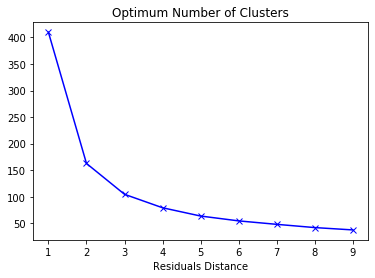

In [190]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

In [191]:
plt.show()

################################
# Final Clusters
################################

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12426.0,1,2,2,4
12427.0,5,1,1,1
12468.0,2,4,4,0
12471.0,5,5,5,3
12472.0,5,5,5,3


In [193]:
segment_data["clusters"].value_counts()

4    16
0    16
3    15
1    11
2     9
Name: clusters, dtype: int64

In [194]:
kmeans = KMeans(n_clusters=7).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    15
3    11
6    10
5     9
4     9
0     7
1     6
Name: clusters, dtype: int64

In [195]:

#....

kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

segment_data["clusters"].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    23
2    13
4    12
3    10
1     9
Name: clusters, dtype: int64

In [196]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12426.0,298,47,762.48,1,2,2,122,Hibernating
12427.0,7,10,303.50,5,1,1,511,New_Customers
12468.0,162,112,2941.20,2,4,4,244,At_Risk
12471.0,10,678,20139.74,5,5,5,555,Champions
12472.0,5,572,11308.48,5,5,5,555,Champions


In [197]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,
12426.0,1,2,2,4
12427.0,5,1,1,2
12468.0,2,4,4,3
12471.0,5,5,5,0
12472.0,5,5,5,0


### RFM & K-Means Joining..

In [198]:
segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [199]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,,
12426.0,Hibernating,1,2,2,4
12427.0,New_Customers,5,1,1,2
12468.0,At_Risk,2,4,4,3
12471.0,Champions,5,5,5,0
12472.0,Champions,5,5,5,0


In [200]:
segmentation.columns

Index(['Segment', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'clusters'], dtype='object')

In [201]:
segmentation.dtypes

Segment             object
RecencyScore      category
FrequencyScore    category
MonetaryScore     category
clusters             int32
dtype: object

In [202]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4
Segment,,,,,
About_to_Sleep,0,0,7,0,1
At_Risk,0,0,0,9,1
Champions,11,0,0,0,0
Hibernating,0,9,0,1,6
Loyal_Customers,11,0,0,0,1
Need_Attention,0,0,0,0,3
New_Customers,0,0,2,0,0
Potential_Loyalists,1,0,4,0,0


In [203]:
segmentation.groupby("Segment").agg({"clusters": "count"})   #.head()

,clusters
Segment,
About_to_Sleep,8
At_Risk,10
Champions,11
Hibernating,16
Loyal_Customers,12
Need_Attention,3
New_Customers,2
Potential_Loyalists,5


In [204]:
segmentation["RecencyScore"] = segmentation["RecencyScore"].astype(int)
segmentation["FrequencyScore"] = segmentation["FrequencyScore"].astype(int)
segmentation["MonetaryScore"] = segmentation["MonetaryScore"].astype(int)

In [205]:
segmentation.groupby("clusters").agg({"RecencyScore":["count","median"],
                                      "FrequencyScore":["median"],
                                      "MonetaryScore":["median","sum"]})

RecencyScore        FrequencyScore MonetaryScore     
                count median         median        median  sum
clusters                                                      
0                  23    5.0              5             5  105
1                   9    2.0              1             1   10
2                  13    3.0              2             2   23
3                  10    1.5              3             3   33
4                  12    2.0              2             2   30

In [206]:
###################################

In [207]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.0
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany,13.2
581,489526,21498,RED SPOTS WRAP,25,2009-12-01 11:50:00,0.42,12533.0,Germany,10.5
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,2009-12-01 11:50:00,1.65,12533.0,Germany,19.8
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 11:50:00,1.25,12533.0,Germany,15.0


In [208]:
# The difference between the first shopping and today

tenure = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.min()).days})

In [209]:
df.groupby('Customer ID').agg({'InvoiceDate': ["min", "max"] })

InvoiceDate                    
                            min                 max
Customer ID                                        
12426.0     2010-02-15 08:41:00 2010-02-15 08:41:00
12427.0     2010-12-03 10:44:00 2010-12-03 10:44:00
12468.0     2010-01-26 10:09:00 2010-07-01 10:28:00
12471.0     2009-12-07 10:41:00 2010-11-30 14:35:00
12472.0     2009-12-14 10:49:00 2010-12-05 14:19:00
...                         ...                 ...
12730.0     2010-07-06 12:19:00 2010-07-06 12:19:00
12738.0     2010-12-02 18:27:00 2010-12-02 18:27:00
13813.0     2009-12-06 10:16:00 2010-06-30 08:50:00
13814.0     2010-06-30 14:12:00 2010-06-30 14:12:00
13815.0     2010-02-12 10:26:00 2010-10-29 11:42:00

[67 rows x 2 columns]

In [210]:
tenure.columns = ["Tenure"]

In [211]:
tenure.head()

,Tenure
Customer ID,
12426.0,298
12427.0,7
12468.0,318
12471.0,368
12472.0,361


In [212]:
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: len(num),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [213]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']

In [214]:
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12426.0,298,47,762.48
12427.0,7,10,303.50
12468.0,162,112,2941.20
12471.0,10,678,20139.74
12472.0,5,572,11308.48


In [215]:
TRFM = tenure.merge(RFM, on="Customer ID")
TRFM.head()

,Tenure,Recency,Frequency,Monetary
Customer ID,,,,
12426.0,298,298,47,762.48
12427.0,7,7,10,303.50
12468.0,318,162,112,2941.20
12471.0,368,10,678,20139.74
12472.0,361,5,572,11308.48


In [216]:
TRFM["Basket Size"] = TRFM ["Monetary"] / TRFM ["Frequency"]

In [217]:
TRFM.head()

,Tenure,Recency,Frequency,Monetary,Basket Size
Customer ID,,,,,
12426.0,298,298,47,762.48,16.222979
12427.0,7,7,10,303.50,30.350000
12468.0,318,162,112,2941.20,26.260714
12471.0,368,10,678,20139.74,29.704631
12472.0,361,5,572,11308.48,19.770070


In [218]:
#pip install -U seaborn

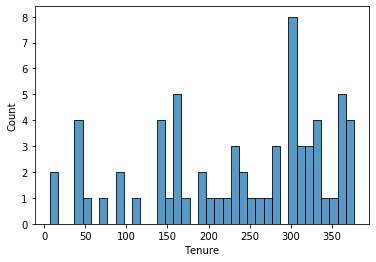

In [219]:
import seaborn as sns

sns.histplot(x=TRFM["Tenure"] , binwidth=10)
plt.show()

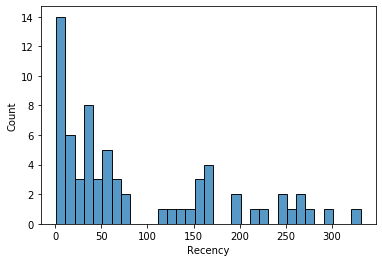

In [220]:
sns.histplot(x=TRFM["Recency"] , binwidth=10)
plt.show()

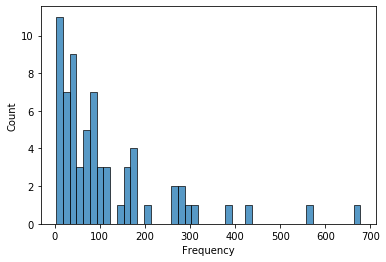

In [221]:
sns.histplot(x=TRFM["Frequency"] , binwidth=15)
plt.show()

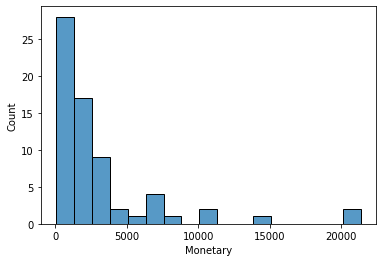

In [222]:
sns.histplot(x=TRFM["Monetary"] )
plt.show()

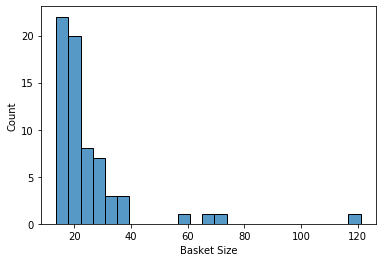

In [223]:
sns.histplot(x=TRFM["Basket Size"])
plt.show()